In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
random_state=42
cross_validation_folds = 5
n_jobs = 2
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]
combined = pd.concat([train_df, test_df])

In [3]:
print('*'*40, "train")
print(train_df.info())
print('*'*40, 'test')
print(test_df.info())

**************************************** train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1

In [4]:
print('train', train_df.shape)
print('test', test_df.shape)

train (1460, 81)
test (1459, 80)


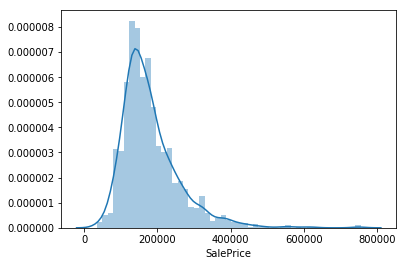

In [3]:
sns.distplot(train_df.SalePrice)

In [16]:
random_state=42
cross_validation_folds = 5
n_jobs = 2
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]
combined = pd.concat([train_df, test_df])
test_ids = test_df.Id
y = train_df.SalePrice

def fill_column_with_median_value(df, column):
    """
    fill numerical columns with median value
    fill categorial columns with most common values
    """
    if df[column].dtype=='float64':
        median_value = df[column].median()
    elif df[column].dtype=='object':
        median_value = df[column].mode()
    df[column] = df[column].fillna(median_value)
def find_columns_with_na_values(df):
    for column in df.columns:
        if df.loc[df[column].isnull()].size>0:
            yield column
for dataset in combine:
    for column in find_columns_with_na_values(dataset):
        fill_column_with_median_value(dataset, column)
    dataset.drop(['Id'], inplace=True, axis=1)
X = pd.get_dummies(train_df)
X_test = pd.get_dummies(test_df)
missing_cols = set( X.columns ) - set( X_test.columns )
print("\tmissing columns", missing_cols)
print('drop missing columns')
for column in missing_cols:
    X.drop(column, inplace=True, axis=1)
#     X_test[column] = 0
print('X shape', X.shape)
print('X_test shape', X_test.shape)

	missing columns {'Condition2_RRAn', 'Electrical_Mix', 'RoofMatl_ClyTile', 'RoofMatl_Metal', 'MiscFeature_TenC', 'Heating_Floor', 'GarageQual_Ex', 'Exterior2nd_Other', 'RoofMatl_Roll', 'HouseStyle_2.5Fin', 'Condition2_RRAe', 'Exterior1st_Stone', 'SalePrice', 'Condition2_RRNn', 'PoolQC_Fa', 'Exterior1st_ImStucc', 'Heating_OthW', 'Utilities_NoSeWa', 'RoofMatl_Membran'}
drop missing columns
X shape (1460, 270)
X_test shape (1459, 270)


## Apply baseline model - Random Forest

In [11]:
? pd.fillna

Object `pd.fillna` not found.


In [17]:
rdf = GradientBoostingRegressor()
cv = cross_val_score(rdf, X, y, cv=cross_validation_folds, n_jobs=n_jobs, verbose=1)
print("baseline model with random forest, performance = {}".format(cv))
rdf.fit(X, y)

[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.7s finished


baseline model with random forest, performance = [0.90075877 0.83527234 0.89873154 0.90189223 0.88447531]


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [20]:
y_pred = rdf.predict(X_test)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": y_pred
})
submission.to_csv('house_price_result_baseline_gradient_boosting_with_missing_features_dropped.csv', index=False)

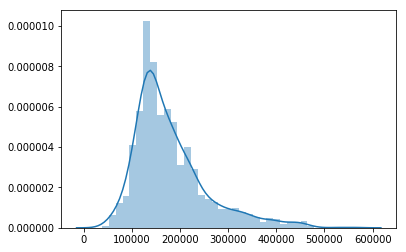

In [21]:
sns.distplot(y_pred)

In [23]:
! kaggle competitions submit house-prices-advanced-regression-techniques -f house_price_result_baseline_gradient_boosting_with_missing_features_dropped.csv \
-m "baseline model with gradient boosting, features missing in test set is dropped in training set"

Successfully submitted to House Prices: Advanced Regression Techniques